In [1]:
#classification on telecom_churn dataset

In [2]:
# import all basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#to load dataset
df=pd.read_csv("telecom_churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
#To remove unwanted columns
df.drop('customerID',axis=1,inplace=True)

In [5]:
# to check number of records in rows and column
df.shape

(7043, 20)

In [6]:
# to checknull values and its sum
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

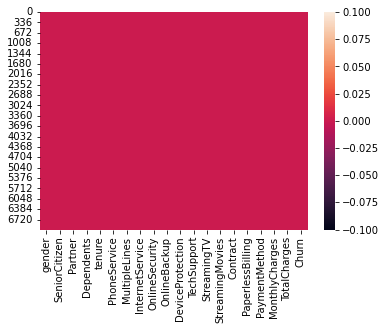

In [7]:
# to check null valuesin visualization
sb.heatmap(df.isnull())
plt.show()

In [8]:
# to check dplicate values in dataset
df.duplicated().sum()

22

In [9]:
#To drop the duplicate values
df.drop_duplicates(inplace=True)

In [10]:
# to check dplicate values in dataset again
df.duplicated().sum()

0

In [11]:
# to check number of records in rows and column after removing duplicates
df.shape

(7021, 20)

In [12]:
# to check data types in dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# variaton found in datatype in column name 'TotalCharges' showing object, but in actual it is float.
#To see the values in TotalCharges column
df['TotalCharges'].value_counts()

          11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
#To see the spaces in dataset :
X=df['TotalCharges'] 
C=0 
for index,value in enumerate(X): 
    if value.isspace(): 
        print(index, ":",value) 
        C+=1
print("Number of rows in which there is empty space are : ",C)

488 :  
753 :  
936 :  
1081 :  
1338 :  
3323 :  
3817 :  
4370 :  
5207 :  
6652 :  
6735 :  
Number of rows in which there is empty space are :  11


In [15]:
'''#To see the spaces :
c=0
for i in df['TotalCharges']:
    if i.isspace():
        c+=1
print("Number of spaces in the column:",c)'''

'#To see the spaces :\nc=0\nfor i in df[\'TotalCharges\']:\n    if i.isspace():\n        c+=1\nprint("Number of spaces in the column:",c)'

In [16]:
#To convert the TotalCharges from object to column
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df['TotalCharges'].replace(' ',np.nan,inplace=True)

In [18]:
# to show all information of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


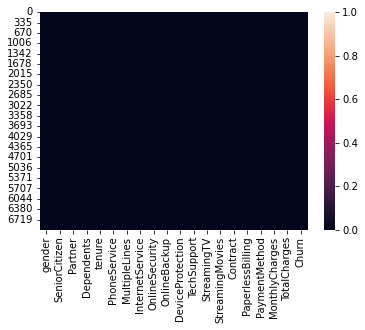

In [19]:
# to check null valuesin visualization
#plt.figure(figsize=(20,20))
sb.heatmap(df.isnull())
plt.show()

In [20]:
# Convert data types of TotalCharges column from object type to float permanently
df['TotalCharges']=df['TotalCharges'].astype("float")
df.dtypes
# we use astype to convert special character in int column

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
# to find the percentage of null values in each column in given dataset
df.isnull().sum()/df.shape[0]*100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156673
Churn               0.000000
dtype: float64

In [22]:
#so first find the MEAN of TotalCharges column
m=df["TotalCharges"].mean()
print("Mean of normalized-losses : ",m)

Mean of normalized-losses :  2290.353388017122


In [23]:
# so fill null values permanently with MEAN of TotalCharges in TotalCharges column
df['TotalCharges'].fillna(m,inplace=True)

In [24]:
#Again check null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

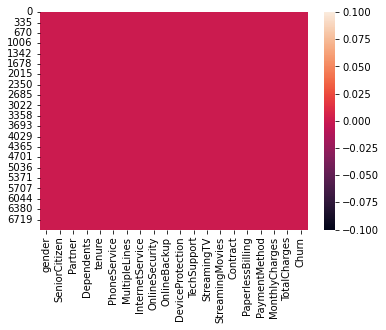

In [25]:
# again check null values in totalcharges after filling it with mean
sb.heatmap(df.isnull())
plt.show()

In [26]:

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
#separate numerical type column and object type column and store in new dataset
df_num=df.select_dtypes(["int64","float64"]) #hold to int and float type data 
df_cat=df.select_dtypes(object) #hold object type data

In [29]:
#change the object type data into numerical type then use LabelEncoder class
from sklearn.preprocessing import LabelEncoder

In [30]:
for col in df_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    df_cat[col]=le.fit_transform(df_cat[col])

In [31]:
#concatenation of both dataset df_num and df_cat and hold new dataset df_new
df_new=pd.concat([df_num,df_cat],axis=1) #axis=1 column wise
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [32]:
# select input and output
X=df_new.drop('Churn',axis=1) # left to right hai isiliye axis 1, # select input
Y=df_new['Churn'] # select output

In [33]:
X.head() #inputs / features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [34]:
Y.head() # output

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [35]:
#To see how many categories in churn column
df_new['Churn'].unique()

array([0, 1])

In [36]:
#To see the values in respective category
df_new['Churn'].value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

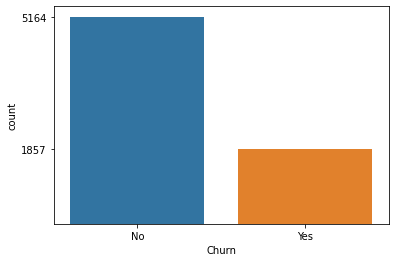

In [37]:
# visualize
sb.countplot(data=df,x='Churn')
f=df['Churn'].value_counts()
plt.yticks(f)
plt.show()

In [38]:
# train the model with 70% data and test the model with 30% data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [39]:
X_train.shape,X_test.shape #(70% in train, 30% in test)

((4914, 19), (2107, 19))

In [40]:
Y_train.shape,Y_test.shape # (70% in train, 30% in test)(nothing after comma means there is only one column)

((4914,), (2107,))

In [41]:
df_new.shape

(7021, 20)

In [42]:
# apply standard scaler on X_train and X_test
from sklearn.preprocessing import StandardScaler

# create an object of StandardScaler class as alias ss
ss=StandardScaler()

In [43]:
#train permanently with 70% data
X_train=ss.fit_transform(X_train)

# test with 30% data
X_test=ss.transform(X_test)

In [44]:
X_train

array([[-0.4472136 ,  1.08344626,  1.04927586, ..., -0.83211942,
         0.8274101 , -1.47874454],
       [ 2.23606798,  0.96091335,  0.39043418, ..., -0.83211942,
         0.8274101 , -1.47874454],
       [-0.4472136 ,  0.3482488 ,  0.17082029, ..., -0.83211942,
        -1.20859052, -1.47874454],
       ...,
       [-0.4472136 , -0.99961321, -0.88565564, ..., -0.83211942,
         0.8274101 ,  0.39867457],
       [-0.4472136 , -1.24467903, -0.35658581, ..., -0.83211942,
         0.8274101 ,  1.33738413],
       [-0.4472136 , -0.9587689 ,  0.52186977, ..., -0.83211942,
         0.8274101 ,  0.39867457]])

In [45]:
#To import classification_report and confusion_report
from sklearn.metrics import classification_report,confusion_matrix


In [46]:
# perform the model with the help of LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression

# create object of LogisticRegression class as alias lr
lr=LogisticRegression()

In [47]:
# Create function

def combo(model):
    
    # to train the model
    model.fit(X_train,Y_train)
    
    # to test the model
    Y_pred=model.predict(X_test)
    
    # To print classification reports and confusion matrix
    print (classification_report(Y_test,Y_pred))
    print (confusion_matrix(Y_test,Y_pred))
    
    return model

In [48]:
# call function and passing the object of logisticRegression class
lr=combo(lr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1582
           1       0.64      0.58      0.61       525

    accuracy                           0.81      2107
   macro avg       0.75      0.74      0.74      2107
weighted avg       0.81      0.81      0.81      2107

[[1413  169]
 [ 222  303]]


In [49]:
# the value of the two category difference should not be more than half, if there is such difference then it is unbalance data.
#Here We saw , more score difference between 0 and 1 class ,behind this reason :
#1. can be  Data Imbalance
# first check either data (output variable) is imbalance or not ?
df_new['Churn'].value_counts() # to check how many 0's and 1's

0    5164
1    1857
Name: Churn, dtype: int64

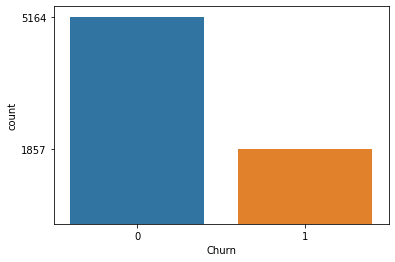

In [50]:
# also visualize to check imbalance in data we use countplot

sb.countplot(data=df_new,x='Churn')
f=df_new['Churn'].value_counts()
plt.yticks(f)
plt.show()

In [51]:
#Sampling Technique :
# first RandomOverSampler :
# call 
from imblearn.over_sampling import RandomOverSampler

In [52]:
X_train.shape,Y_train.shape

((4914, 19), (4914,))

In [53]:
Y_train.value_counts() # difference is more than double

0    3582
1    1332
Name: Churn, dtype: int64

In [54]:
# to convert minority class(1) data into majority class(0), 
# we use RandomOverSampler class
# create a object of RandomOverSampler class as alias ros
ros=RandomOverSampler(random_state=1) 

In [55]:
# applying RandomOverSampler on training data X_train, Y_train

X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [56]:
# check after applying oversampler
Y_train_ros.value_counts()

0    3582
1    3582
Name: Churn, dtype: int64

In [57]:
X_train_ros.shape,Y_train_ros.shape

((7164, 19), (7164,))

In [58]:
# similarly apply over_sampler  on testing data (30%)
# first check number of samples 0's and 1's in input variable

Y_test.value_counts()

0    1582
1     525
Name: Churn, dtype: int64

In [59]:
# now apply over sampler on testing data to do balance
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [60]:
# now check apter applying oversampler on testing data
Y_test_ros.value_counts()

0    1582
1    1582
Name: Churn, dtype: int64

In [61]:
X_test_ros.shape,Y_test_ros.shape

((3164, 19), (3164,))

In [62]:
X_train_ros.shape,Y_train_ros.shape

((7164, 19), (7164,))

In [63]:

# Create function

def final_combo(model):
    
    # to train the model
    model.fit(X_train_ros,Y_train_ros)
    
    # to test the model
    Y_pred=model.predict(X_test_ros)
    
    # To print classification reports and confusion matrix
    print (classification_report(Y_test_ros,Y_pred))
    print (confusion_matrix(Y_test_ros,Y_pred))
    
    return model

In [64]:
# Now giving this balanced output values to function
# call function and passing the object of logisticRegression class
lr=final_combo(lr)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1582
           1       0.74      0.81      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.77      0.76      0.76      3164
weighted avg       0.77      0.76      0.76      3164

[[1138  444]
 [ 301 1281]]


In [65]:
#Here score is good but not better . can be better ,for apply 
# DecisionTreeClassifier class  , bcoz DTC help to select imp input features
#with the help of Gini Index or Entropy 
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class
# now perform model with DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

In [66]:
# create object of DecisionTreeClassifier class as dt
dt=DecisionTreeClassifier(random_state=1) # by default gini index method

In [67]:
# call function create_model and pass the object of DecisionTreeClassifier class as dt
dt=final_combo(dt)

              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1582
           1       0.73      0.50      0.59      1582

    accuracy                           0.66      3164
   macro avg       0.68      0.66      0.65      3164
weighted avg       0.68      0.66      0.65      3164

[[1297  285]
 [ 796  786]]


In [68]:
# create a dictionary for dataset
d={'Input':X.columns,'Info Gain':dt.feature_importances_}
# check important features means check information of each input after train

# now convert into dataframe
F=pd.DataFrame(d)
F.sort_values('Info Gain',ascending=False,ignore_index=True)
# sorting : means arrange records in descending order according to IG column 
#and ignore index number

,Input,Info Gain
0,Contract,0.244379
1,MonthlyCharges,0.198958
2,TotalCharges,0.170931
3,tenure,0.102704
4,PaymentMethod,0.040119
5,OnlineSecurity,0.038087
6,gender,0.025797
7,StreamingMovies,0.021134
8,SeniorCitizen,0.019403
9,PaperlessBilling,0.018836


In [69]:
#But we got less score 0.77 % its good but not excellent , 
#reason behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

In [70]:
#to remove overfitting situation, Use Pruning Technique
# There are two types Pruning Technique
#1) max_depth : inbuilt parameter of DecisionTreeClassifier ( maximum depth <= 8 )

'''
for i in range (1,9):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Number of max_dpeth:",i)
    #Give it to the function
    dt1=final_combo(dt1)
    dt1
'''

dt1=DecisionTreeClassifier(random_state=1,max_depth=4) # by default Gini index
dt1=final_combo(dt1)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1582
           1       0.73      0.80      0.76      1582

    accuracy                           0.75      3164
   macro avg       0.76      0.75      0.75      3164
weighted avg       0.76      0.75      0.75      3164

[[1124  458]
 [ 321 1261]]


In [71]:
# create a dictionary for dataset
d={'Input':X.columns,'Info Gain':dt1.feature_importances_}

# now convert into dataframe
F=pd.DataFrame(d)
F.sort_values('Info Gain',ascending=False,ignore_index=True)

,Input,Info Gain
0,Contract,0.693685
1,OnlineSecurity,0.097063
2,tenure,0.083817
3,MonthlyCharges,0.064707
4,StreamingMovies,0.029984
5,InternetService,0.024343
6,TotalCharges,0.005334
7,SeniorCitizen,0.001067
8,MultipleLines,0.000000
9,PhoneService,0.000000


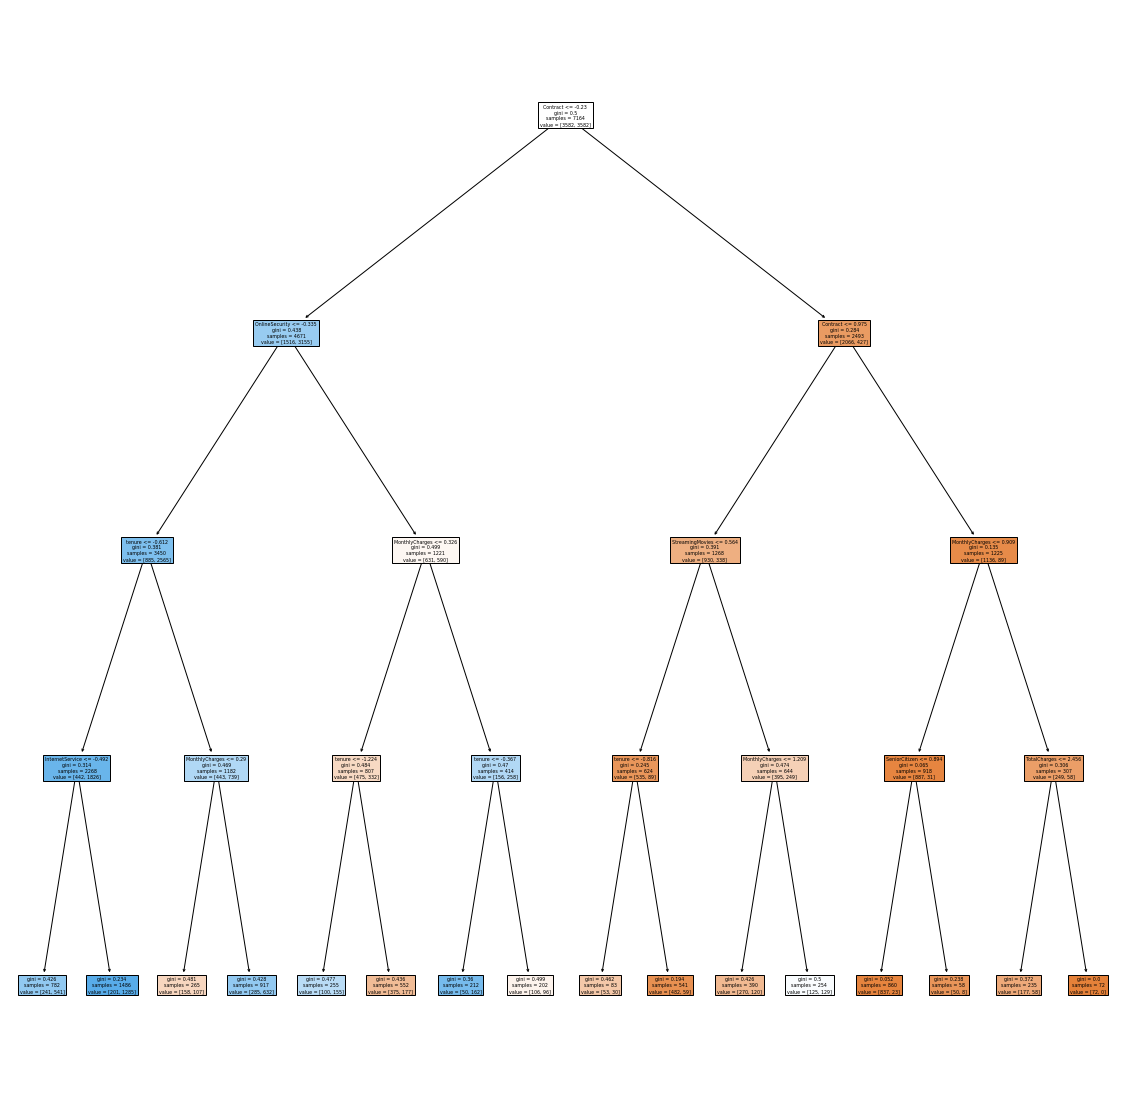

In [72]:
# create a tree 
from sklearn import tree

# Tree hamesha inputs/features pe banega, so inputs are in columns
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [73]:
#2nd pruning technique : min_samples_leaf
# leaf means no any child
# min_samples_leaf (more than and equals to)>= 45 and (less than and equals to)<= 100

In [74]:
# create object opf DecisionTreeClassifier class and passing the argument/
# parameter min_sample_leaf --> by default Gini index method

# for loop
'''
for i in range (45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print ('Min Samples Leaf',i)
    dt2=final_combo(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) #temporary commnt kiya hai for loop ke liye
print ('Min Samples Leaf 45')
dt2=final_combo(dt2)

Min Samples Leaf 45
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1582
           1       0.74      0.79      0.76      1582

    accuracy                           0.75      3164
   macro avg       0.75      0.75      0.75      3164
weighted avg       0.75      0.75      0.75      3164

[[1133  449]
 [ 331 1251]]


In [75]:
# First create object of DecisionTreeClassifier class and passing the parameter criterion='entropy'
# by default criterion = 'gini index' if did not give

dt=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [76]:
# call function
dt=final_combo(dt)

              precision    recall  f1-score   support

           0       0.63      0.80      0.70      1582
           1       0.73      0.52      0.61      1582

    accuracy                           0.66      3164
   macro avg       0.68      0.66      0.66      3164
weighted avg       0.68      0.66      0.66      3164

[[1273  309]
 [ 759  823]]


In [77]:
# apply pruning technique for DTC using entropy
# max_depth <= 8 (less than and equals to)
'''
for i in range (1,9):
    dt=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print ('\nMax depth : ',i)
    # call function
    dt=final_combo(dt)
'''
dt=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4) # best was depth 6
# call function
print ('Max depth : ',4)
dt=final_combo(dt)

Max depth :  4
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1582
           1       0.74      0.79      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.76      0.76      0.76      3164
weighted avg       0.76      0.76      0.76      3164

[[1147  435]
 [ 326 1256]]


In [78]:
# apply 2nd pruning technique min_sample_leaf
'''
for i in range (45,101):
    dt=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print ('\nMin Samples Leaf : ',i)
    # call function
    dt=final_combo(dt)
'''
dt=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=54)
print ('Min Samples Leaf : ',54) # this was best
# call function
dt=final_combo(dt)

Min Samples Leaf :  54
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1582
           1       0.75      0.75      0.75      1582

    accuracy                           0.75      3164
   macro avg       0.75      0.75      0.75      3164
weighted avg       0.75      0.75      0.75      3164

[[1180  402]
 [ 396 1186]]


In [79]:
#Ensembling Technique : -
#There are different types of Ensembling technique


In [80]:
# Apply Ensembling Technique : randomforesttree(it is bootstamping method with bagging)👍

# call RandomForestTree from package
from sklearn.ensemble import RandomForestClassifier

In [81]:
X.shape # total records are 11162 and max featurs are 16

(7021, 19)

In [82]:
# using GINI index
#created object of RandomForestClassifier as 'rfc'
rfc=RandomForestClassifier(n_estimators=10,max_features=7,
                           random_state=1) # by default GINI index
# by default 10 # temporary comment for loop
# here n_estimators means take how many decisiontreeclassifier min=10 and max=100
#call function
print('\nNo of Features : ',7) # feature no 11 taken as the score was better
rfc=final_combo(rfc)

'''
for i in range(19,1,-1): # we can also do in ascending (1,20)=20-1=19
    #created object of RandomForestClassifier as 'rfc'
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('\nNo of Features : ',i)
    #call function
    rfc=final_combo(rfc)
'''


No of Features :  7
              precision    recall  f1-score   support

           0       0.65      0.87      0.75      1582
           1       0.80      0.54      0.65      1582

    accuracy                           0.70      3164
   macro avg       0.73      0.70      0.70      3164
weighted avg       0.73      0.70      0.70      3164

[[1373  209]
 [ 725  857]]


"\nfor i in range(19,1,-1): # we can also do in ascending (1,20)=20-1=19\n    #created object of RandomForestClassifier as 'rfc'\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    print('\nNo of Features : ',i)\n    #call function\n    rfc=final_combo(rfc)\n"

In [83]:
# using entropy index
#created object of RandomForestClassifier as 'rfc'
rfc=RandomForestClassifier(n_estimators=10,max_features=3,
                               random_state=1,criterion='entropy')
print('No of Features : ',3) # 3 features mai score best hai
#call function
rfc=final_combo(rfc)

'''
for i in range(1,20): 
    #created object of RandomForestClassifier as 'rfc'
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,
                               random_state=1,criterion='entropy')
    print('\nNo of Features : ',i)
    #call function
    rfc=final_combo(rfc)
'''

No of Features :  3
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1582
           1       0.80      0.56      0.66      1582

    accuracy                           0.71      3164
   macro avg       0.73      0.71      0.70      3164
weighted avg       0.73      0.71      0.70      3164

[[1368  214]
 [ 699  883]]


"\nfor i in range(1,20): \n    #created object of RandomForestClassifier as 'rfc'\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,\n                               random_state=1,criterion='entropy')\n    print('\nNo of Features : ',i)\n    #call function\n    rfc=final_combo(rfc)\n"

In [84]:
# show the information gain of all input features
d={'Input':X.columns,'Info Gain':rfc.feature_importances_}

# now convert into dataframe
F=pd.DataFrame(d)
F.sort_values('Info Gain',ascending=False,ignore_index=True)

,Input,Info Gain
0,TotalCharges,0.173299
1,MonthlyCharges,0.164219
2,tenure,0.144533
3,Contract,0.108477
4,OnlineSecurity,0.059838
5,PaymentMethod,0.049066
6,TechSupport,0.035683
7,gender,0.029260
8,InternetService,0.028080
9,MultipleLines,0.027063


In [85]:
# USE BOOSTING Technique : it is ensembling technique

# 1st tech : ADA BOOST : means adaptor Boosting : its work on decission stump

# apply ADA BOOST on given dataset of bank.csv
from sklearn.ensemble import AdaBoostClassifier

In [86]:
X.shape

(7021, 19)

In [87]:
# creating object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=11,random_state=1)
# temporary comment for lopp # taken n_estimators=3 as it was better
# n_estimators means no of decision stump, it can be <= 100 # 19 means inputs
# now call function
print ('No. of Decission Stump : ',11)
ada=final_combo(ada)


'''
for i in range(1,20):
    # creating object of AdaBoostClassifier class
    ada=AdaBoostClassifier(n_estimators=i)
    print ('\nNo. of Decission Stump : ',i)
    
    #now call function
    ada=final_combo(ada)
'''

No. of Decission Stump :  11
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1582
           1       0.73      0.81      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.76      0.76      0.76      3164
weighted avg       0.76      0.76      0.76      3164

[[1116  466]
 [ 293 1289]]


"\nfor i in range(1,20):\n    # creating object of AdaBoostClassifier class\n    ada=AdaBoostClassifier(n_estimators=i)\n    print ('\nNo. of Decission Stump : ',i)\n    \n    #now call function\n    ada=final_combo(ada)\n"

In [88]:
# Applying Gradient Boost technuique on same dataset telecom_churn.csv which hold in dataframe df
# call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
# create object of GradientBoostingClassifier class

gbc=GradientBoostingClassifier(n_estimators=37,random_state=1) # 37 was better
# here n_estimator can be <=100 by default algorithm decissiontreeclassifier
#call function
print ('No of estimators :',37)
gbc=final_combo(gbc)

'''
for i in range(10,101,1):
    # create object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print ('\nNo of estimators :',i)
    
    #call function
    gbc=final_combo(gbc)
'''

No of estimators : 37
              precision    recall  f1-score   support

           0       0.80      0.72      0.75      1582
           1       0.74      0.82      0.78      1582

    accuracy                           0.77      3164
   macro avg       0.77      0.77      0.77      3164
weighted avg       0.77      0.77      0.77      3164

[[1134  448]
 [ 288 1294]]


"\nfor i in range(10,101,1):\n    # create object of GradientBoostingClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print ('\nNo of estimators :',i)\n    \n    #call function\n    gbc=final_combo(gbc)\n"

In [90]:
# XGB: XGBClassifier class:- use inbuilt
# package xgboost
#!pip install xgboost

In [91]:
# call library
from xgboost import XGBClassifier

In [92]:
# for loop se pata chal jata hai kisme acha hai result
'''
for i in range(10,101):
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print ('\nNo of Estimators :',i)
    #call function
    xgc=final_combo(xgc)
'''
# now create object of XGBClassifier class as alias xgb
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1) #reg_alpha=1 means yesss 
# 10 pe better hai
print ('\nNo of Estimators :',10)
#call function
xgc=final_combo(xgc)

# automatically overfitting : reg means regularisation and alpha or lambda : hyperparameter
# n_estimators can be minimum 10 and maximum 100



No of Estimators : 10
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1582
           1       0.75      0.78      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.76      0.76      0.76      3164
weighted avg       0.76      0.76      0.76      3164

[[1179  403]
 [ 347 1235]]


# Conclusion: As per recall score  
# DecisionTreeClassifier(Entropy : min_sample_leaf) is best algo.
# 0's=75 and 1's=85

    Recall score in different algo are:
        1) logisticRegression                               : 0's=89 and 1's=58
        2) DecisionTreeClassifier                           : 0's=82 and 1's=50
        3) DecisionTreeClassifier (max_depth)               : 0's=71 and 1's=80
        4) DecisionTreeClassifier (min_sample_leaf)         : 0's=72 and 1's=79
        5) DecisionTreeClassifier (Entropy:max_depth)       : 0's=73 and 1's=79
        6) DecisionTreeClassifier (Entropy:min_sample_leaf) : 0's=75 and 1's=85 **
        7) RandomForestClassifier (GINI index)              : 0's=87 and 1's=54
        7) RandomForestClassifier (Entropy)                 : 0's=86 and 1's=56
        8) AdaBoostClassifier                               : 0's=71 and 1's=81
        9) GradientBoostingClassifier                       : 0's=72 and 1's=82
       10) XGBClassifier                                    : 0's=75 and 1's=78